# <div style align = 'center'>COMPAS 김해시 화재발생 예측모델 개발</style>

In [28]:
# 반복 작업 시 이걸로.

train = pd.read_csv('C:/develop/jupyter notebook/COMPAS/PJT002_train.csv', parse_dates=["dt_of_fr"])
val = pd.read_csv('C:/develop/jupyter notebook/COMPAS/PJT002_validation.csv', parse_dates=["dt_of_fr"])
test = pd.read_csv('C:/develop/jupyter notebook/COMPAS/PJT002_test.csv', parse_dates=["dt_of_fr"])
sub = pd.read_csv('C:/develop/jupyter notebook/COMPAS/PJT002_submission.csv')

train["dt_year"] = train["dt_of_fr"].dt.year
train["dt_month"] = train["dt_of_fr"].dt.month
train["dt_day"] = train["dt_of_fr"].dt.day
train["dt_hour"] = train["dt_of_fr"].dt.hour
train["dt_minute"] = train["dt_of_fr"].dt.minute
train["dt_dayofweek"] = train["dt_of_fr"].dt.dayofweek

val["dt_year"] = val["dt_of_fr"].dt.year
val["dt_month"] = val["dt_of_fr"].dt.month
val["dt_day"] = val["dt_of_fr"].dt.day
val["dt_hour"] = val["dt_of_fr"].dt.hour
val["dt_minute"] = val["dt_of_fr"].dt.minute
val["dt_dayofweek"] = val["dt_of_fr"].dt.dayofweek

test["dt_year"] = test["dt_of_fr"].dt.year
test["dt_month"] = test["dt_of_fr"].dt.month
test["dt_day"] = test["dt_of_fr"].dt.day
test["dt_hour"] = test["dt_of_fr"].dt.hour
test["dt_minute"] = test["dt_of_fr"].dt.minute
test["dt_dayofweek"] = test["dt_of_fr"].dt.dayofweek

binary_y = {'N': 0, 'Y': 1}
train['fr_yn'] = train['fr_yn'].map(binary_y)
val['fr_yn'] = val['fr_yn'].map(binary_y)

df_all = pd.concat([train, val, test])
categorical_cols = df_all.select_dtypes(['object']).columns
for col in categorical_cols:
    df_all[col] = pd.Categorical(df_all[col]).codes
    
train = df_all[:len(train)]
val = df_all[len(train):-len(test)]
test = df_all[-len(test):]

In [4]:
for col in train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (train[col].isnull().sum() / train[col].shape[0]))
    print(msg)

column: ahsm_dstnc	 Percent of NaN value: 0.00%
column:   bldng_ar	 Percent of NaN value: 0.00%
column: bldng_ar_prc	 Percent of NaN value: 36.99%
column: bldng_archtctr	 Percent of NaN value: 0.00%
column:  bldng_cnt	 Percent of NaN value: 0.00%
column: bldng_cnt_in_50m	 Percent of NaN value: 0.00%
column:   bldng_us	 Percent of NaN value: 0.00%
column: bldng_us_clssfctn	 Percent of NaN value: 0.00%
column: blk_dngrs_thng_mnfctr_yn	 Percent of NaN value: 0.00%
column: cctv_dstnc	 Percent of NaN value: 0.00%
column: cctv_in_100m	 Percent of NaN value: 0.00%
column: cltrl_hrtg_yn	 Percent of NaN value: 0.00%
column: dngrs_thng_yn	 Percent of NaN value: 0.00%
column:     dt_day	 Percent of NaN value: 0.00%
column: dt_dayofweek	 Percent of NaN value: 0.00%
column:    dt_hour	 Percent of NaN value: 0.00%
column:  dt_minute	 Percent of NaN value: 0.00%
column:   dt_month	 Percent of NaN value: 0.00%
column: dt_of_athrztn	 Percent of NaN value: 0.00%
column:   dt_of_fr	 Percent of NaN value:

In [37]:
target = []
for col in train.columns:
    ratio_NULL = 100 * (train[col].isnull().sum() / train[col].shape[0])
    if ratio_NULL >= 40:
        target.append(col)

In [38]:
target

['ele_engry_us_201401',
 'ele_engry_us_201402',
 'ele_engry_us_201403',
 'ele_engry_us_201404',
 'ele_engry_us_201405',
 'ele_engry_us_201406',
 'ele_engry_us_201407',
 'ele_engry_us_201408',
 'ele_engry_us_201409',
 'ele_engry_us_201410',
 'ele_engry_us_201411',
 'ele_engry_us_201412',
 'ele_engry_us_201501',
 'ele_engry_us_201502',
 'ele_engry_us_201503',
 'ele_engry_us_201504',
 'ele_engry_us_201505',
 'ele_engry_us_201506',
 'ele_engry_us_201507',
 'ele_engry_us_201508',
 'ele_engry_us_201509',
 'ele_engry_us_201510',
 'ele_engry_us_201511',
 'ele_engry_us_201512',
 'ele_engry_us_201601',
 'ele_engry_us_201602',
 'ele_engry_us_201603',
 'ele_engry_us_201604',
 'ele_engry_us_201605',
 'ele_engry_us_201606',
 'ele_engry_us_201607',
 'ele_engry_us_201608',
 'ele_engry_us_201609',
 'ele_engry_us_201610',
 'ele_engry_us_201611',
 'ele_engry_us_201612',
 'ele_engry_us_201701',
 'ele_engry_us_201702',
 'ele_engry_us_201703',
 'ele_engry_us_201704',
 'ele_engry_us_201705',
 'ele_engry_us_2

In [42]:
X_train = train.drop(['fr_yn', 'dt_of_fr', 'id',], 1)
y_train = train['fr_yn']
X_val = val.drop(['fr_yn', 'dt_of_fr', 'id'], 1)
y_val = val['fr_yn']
test = test.drop(['fr_yn', 'dt_of_fr', 'id'], 1)

In [43]:
X_train = X_train.drop(target, 1)
X_val = X_val.drop(target, 1)
test = test.drop(target, 1)

In [44]:
X_train = X_train.fillna(X_train.mean()) 
X_val = X_val.fillna(X_val.mean()) 
test = test.fillna(test.mean())

## <font color='red'>Import Module</font> 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
!pip install missingno
import missingno as msno
import math

In [2]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

## <font color='red'>Load Dataset</font>

In [5]:
# dt_of_fr은 날짜로 해석하기 위해 parse_dates 옵션 추가
train = pd.read_csv('C:/develop/jupyter notebook/COMPAS/PJT002_train.csv', parse_dates=["dt_of_fr"])
val = pd.read_csv('C:/develop/jupyter notebook/COMPAS/PJT002_validation.csv', parse_dates=["dt_of_fr"])
test = pd.read_csv('C:/develop/jupyter notebook/COMPAS/PJT002_test.csv', parse_dates=["dt_of_fr"])
sub = pd.read_csv('C:/develop/jupyter notebook/COMPAS/PJT002_submission.csv')

## <font color='red'>Data Check</font>

In [ ]:
print(train.shape)
print(val.shape)
print(test.shape)

#### train dataset에 대한 간단한 분석

In [ ]:
train.head()

In [ ]:
train.info(True)

In [ ]:
train.describe()

#### NULL Data Check

In [6]:
# train data의 NULL Data Check
for col in train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (train[col].isnull().sum() / train[col].shape[0]))
    print(msg)

column:   dt_of_fr	 Percent of NaN value: 0.00%
column:      fr_yn	 Percent of NaN value: 0.00%
column:   bldng_us	 Percent of NaN value: 46.75%
column: bldng_archtctr	 Percent of NaN value: 46.73%
column:  bldng_cnt	 Percent of NaN value: 0.00%
column:   bldng_ar	 Percent of NaN value: 0.00%
column:     ttl_ar	 Percent of NaN value: 0.00%
column:     lnd_ar	 Percent of NaN value: 0.00%
column: dt_of_athrztn	 Percent of NaN value: 46.59%
column: ttl_grnd_flr	 Percent of NaN value: 17.25%
column: ttl_dwn_flr	 Percent of NaN value: 18.59%
column: bldng_us_clssfctn	 Percent of NaN value: 49.57%
column:     tmprtr	 Percent of NaN value: 0.02%
column:    prcpttn	 Percent of NaN value: 90.59%
column:    wnd_spd	 Percent of NaN value: 0.06%
column:  wnd_drctn	 Percent of NaN value: 0.37%
column:       hmdt	 Percent of NaN value: 0.04%
column: gas_engry_us_201401	 Percent of NaN value: 46.59%
column: ele_engry_us_201401	 Percent of NaN value: 46.59%
column: gas_engry_us_201402	 Percent of NaN 

In [7]:
# test data의 NULL Data Check
for col in test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (test[col].isnull().sum() / test[col].shape[0]))
    print(msg)

column:   dt_of_fr	 Percent of NaN value: 0.00%
column:   bldng_us	 Percent of NaN value: 15.86%
column: bldng_archtctr	 Percent of NaN value: 15.56%
column:  bldng_cnt	 Percent of NaN value: 0.00%
column:   bldng_ar	 Percent of NaN value: 0.00%
column:     ttl_ar	 Percent of NaN value: 0.00%
column:     lnd_ar	 Percent of NaN value: 0.00%
column: dt_of_athrztn	 Percent of NaN value: 15.56%
column: ttl_grnd_flr	 Percent of NaN value: 11.60%
column: ttl_dwn_flr	 Percent of NaN value: 13.49%
column: bldng_us_clssfctn	 Percent of NaN value: 23.23%
column:     tmprtr	 Percent of NaN value: 0.03%
column:    prcpttn	 Percent of NaN value: 92.66%
column:    wnd_spd	 Percent of NaN value: 0.03%
column:  wnd_drctn	 Percent of NaN value: 0.14%
column:       hmdt	 Percent of NaN value: 0.07%
column: gas_engry_us_201401	 Percent of NaN value: 15.56%
column: ele_engry_us_201401	 Percent of NaN value: 15.56%
column: gas_engry_us_201402	 Percent of NaN value: 15.56%
column: ele_engry_us_201402	 Perce

column: fr_wthr_fclt_in_100m	 Percent of NaN value: 0.00%
column: cctv_in_100m	 Percent of NaN value: 0.00%
column: tbc_rtl_str_dstnc	 Percent of NaN value: 0.00%
column: sft_emrgnc_bll_dstnc	 Percent of NaN value: 0.00%
column: ahsm_dstnc	 Percent of NaN value: 0.00%
column: no_tbc_zn_dstnc	 Percent of NaN value: 0.00%
column: bldng_cnt_in_50m	 Percent of NaN value: 0.00%
column:  trgt_crtr	 Percent of NaN value: 92.12%
column: fr_fghtng_fclt_spcl_css_5_yn	 Percent of NaN value: 81.16%
column: fr_fghtng_fclt_spcl_css_6_yn	 Percent of NaN value: 81.16%
column:      us_yn	 Percent of NaN value: 78.39%
column: dngrs_thng_yn	 Percent of NaN value: 78.39%
column: slf_fr_brgd_yn	 Percent of NaN value: 78.39%
column: blk_dngrs_thng_mnfctr_yn	 Percent of NaN value: 78.39%
column: cltrl_hrtg_yn	 Percent of NaN value: 78.39%
column:      fr_yn	 Percent of NaN value: 100.00%


결측치의 비율이 심각한 column들이 많으나 일단 첫 번째 모델에는 모든 변수를 투입하겠다.

#### Target Lable Check

In [ ]:
df_train_val = pd.concat([train, val])

In [ ]:
c

In [ ]:
# Validation Dataset 에서 화재 발생 비율
f, ax = plt.subplots(1, 2, figsize=(18, 8))

val['fr_yn'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - fr_yn')
ax[0].set_ylabel('')
sns.countplot('fr_yn', data=val, ax=ax[1])
ax[1].set_title('Count plot - fr_yn')

plt.show()

Target Lable을 살펴본 결과, 하나의 결과값에 치우져있지 않기 때문에 분석하기에 무리가 없는 데이터라고 판단한다.

## <font color='red'>EDA</font>

### Parse datetime

In [ ]:
type(train.dt_of_fr)

In [92]:
train["dt_year"] = train["dt_of_fr"].dt.year
train["dt_month"] = train["dt_of_fr"].dt.month
train["dt_day"] = train["dt_of_fr"].dt.day
train["dt_hour"] = train["dt_of_fr"].dt.hour
train["dt_minute"] = train["dt_of_fr"].dt.minute

In [93]:
# dayofweek는 날짜에서 요일(월~일)을 가져오는 기능.
# 값은 0(월), 1(화), 2(수), 3(목), 4(금), 5(토), 6(일) 을 나타냄.
train["dt_dayofweek"] = train["dt_of_fr"].dt.dayofweek

In [ ]:
train[["dt_of_fr", "dt_year", "dt_month", "dt_day", "dt_hour", "dt_minute", "dt_dayofweek"]].head()

validation dataset과 test dataset에도 동일한 작업을 진행하겠다.

In [94]:
val["dt_year"] = val["dt_of_fr"].dt.year
val["dt_month"] = val["dt_of_fr"].dt.month
val["dt_day"] = val["dt_of_fr"].dt.day
val["dt_hour"] = val["dt_of_fr"].dt.hour
val["dt_minute"] = val["dt_of_fr"].dt.minute
val["dt_dayofweek"] = val["dt_of_fr"].dt.dayofweek

In [95]:
test["dt_year"] = test["dt_of_fr"].dt.year
test["dt_month"] = test["dt_of_fr"].dt.month
test["dt_day"] = test["dt_of_fr"].dt.day
test["dt_hour"] = test["dt_of_fr"].dt.hour
test["dt_minute"] = test["dt_of_fr"].dt.minute
test["dt_dayofweek"] = test["dt_of_fr"].dt.dayofweek

년, 월, 일, 시, 분, 초를 기준으로 화재 발생 건수를 확인할 필요가 있다.

In [ ]:
print(train.shape)
print(val.shape)
print(test.shape)

In [ ]:
year_fire = train[['dt_year', 'fr_yn']]
year_fire = year_fire[year_fire.fr_yn != 'N']
year_fire = year_fire["dt_year"].value_counts().rename_axis('year').reset_index(name='fire_Yes')
year_fire = year_fire.sort_values(["year"], ascending=[True])
year_fire.head()

In [ ]:
month_fire = train[['dt_month', 'fr_yn']]
month_fire = month_fire[month_fire.fr_yn != 'N']
month_fire = month_fire["dt_month"].value_counts().rename_axis('month').reset_index(name='fire_Yes')
month_fire = month_fire.sort_values(["month"], ascending=[True])
month_fire.head()

In [ ]:
day_fire = train[['dt_day', 'fr_yn']]
day_fire = day_fire[day_fire.fr_yn != 'N']
day_fire = day_fire["dt_day"].value_counts().rename_axis('day').reset_index(name='fire_Yes')
day_fire = day_fire.sort_values(["day"], ascending=[True])
day_fire.head()

In [ ]:
hour_fire = train[['dt_hour', 'fr_yn']]
hour_fire = hour_fire[hour_fire.fr_yn != 'N']
hour_fire = hour_fire["dt_hour"].value_counts().rename_axis('hour').reset_index(name='fire_Yes')
hour_fire = hour_fire.sort_values(["hour"], ascending=[True])
hour_fire.head()

In [ ]:
minute_fire = train[['dt_minute', 'fr_yn']]
minute_fire = minute_fire[minute_fire.fr_yn != 'N']
minute_fire = minute_fire["dt_minute"].value_counts().rename_axis('minute').reset_index(name='fire_Yes')
minute_fire = minute_fire.sort_values(["minute"], ascending=[True])
minute_fire.head()

#### Explore with visualization

In [ ]:
%matplotlib inline

# seaborn의 barplot으로, subplots의 각 구역에 연, 월, 일, 시, 별 화재 발생 건수를 출력

# 2x2, 총 4개의 시각화를 한 화면에 띄우기
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

# 시각화의 전체 사이즈는 18x12로 설정
figure.set_size_inches(18, 12)

sns.barplot(data=year_fire, x="year", y="fire_Yes", ax=ax1)
sns.barplot(data=month_fire, x="month", y="fire_Yes", ax=ax2)
sns.barplot(data=day_fire, x="day", y="fire_Yes", ax=ax3)
sns.barplot(data=hour_fire, x="hour", y="fire_Yes", ax=ax4)

# seaborn의 barplot으로 분 별 화재 발생 건수를 출력
figure, ax5 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)
sns.barplot(data=minute_fire, x="minute", y="fire_Yes", ax=ax5)

위 막대그래프를 통해 알 수 있는 내용은 다음과 같다.

#### year
* 2015년도에 가장 많은 화재가 발생했고 가장 적게 화재가 발생한 2018년과 발생 횟수가 상당히 차이나는 것을 볼 수 있다.<br>
* 그렇지만 연도별 화재 발생 건수에 대한 막대그래프에서 일정한 추세를 확인할 수는 없었다.<br>
* 2015년도와 2017년도가 다른 해에 비해 왜 더 많은 화재가 발생했는지 확인할 수 있다면 그것을 확인해야 할 것이며,<br>
  그렇지 못 하다면 연도별 화재 발생 건수는 분석에 도움이 되지 않을 것으로 보인다.

#### month
* 겨울에서 초봄(12월-3월)사이에 가장 많이 화재가 발생했으며, 여름에서 늦여름(6-9월)까지는 비교적 화재 발생 건수가 적다.
* 5월과 10월, 11월 또한 여름에 비해 화재 발생 건수가 많다. 한창 건조할 봄과 가을이기 때문일 것이다.

#### day
* 월 초와 월 중반이 다른 때에 비해 화재 발생 건수가 많은 것을 확인할 수 있다.
* 그 외의 특정한 추세는 보이지 않으나 31일이 유난히 화재 발생 건수가 적었다.<br>
  당연한 것이, 1년 중 1월, 3월, 5월, 7월, 8월, 10월, 12월만 31일이 있기 때문이다. 크게 문제가 될 것 같진 않아 보인다.

#### hour
* 사람들이 많이 활동하는 시간일수록 화재 발생 건수가 많아지는 추세를 보인다.


#### minute
* 특별한 추세가 보이지 않는다.


#### second
* 화재가 발생한 '초'는 전부 0으로 기록되어 있다. 공모전 주최측에서 second는 활용하지 말라고 하였기에 분석 대상에서 제외한다.

#### <font color="red">결론 : day는 의미없는 데이터로 보이나 일단은 먼저 앙상블 모델에 투입한다. 이후 day를 제거한 모델을 새로 만들어보기로 하자.</font>

### <del>Parse district</del> 
<font color='red'>지역은 구분하지 않기로 확정</font>

In [9]:
train["emd_nm_1"] = train.emd_nm.str.split(' ').str[0]
train["emd_nm_2"] = train.emd_nm.str.split(' ').str[1]
train["emd_nm_3"] = train.emd_nm.str.split(' ').str[2]

In [ ]:
train[['emd_nm_1', 'emd_nm_2', 'emd_nm_3']].head(10)

In [ ]:
train['emd_nm_1'].value_counts()

In [ ]:
train['emd_nm_2'].value_counts().head(10)

In [ ]:
train['emd_nm_3'].value_counts().head(10)

In [10]:
# 앙상블 모델에 emd_nm은 쓰지 않도록 하며, emd_nm_1 은 전부 '경상남도'이므로 모델에 적용하지 않도록 한다.
train = train.drop(['emd_nm', 'emd_nm_1'], axis=1)

In [11]:
# validation dataset과 test dataset에도 동일한 작업을 진행

val["emd_nm_1"] = val.emd_nm.str.split(' ').str[0]
val["emd_nm_2"] = val.emd_nm.str.split(' ').str[1]
val["emd_nm_3"] = val.emd_nm.str.split(' ').str[2]
val = val.drop(['emd_nm', 'emd_nm_1'], axis=1)

test["emd_nm_1"] = test.emd_nm.str.split(' ').str[0]
test["emd_nm_2"] = test.emd_nm.str.split(' ').str[1]
test["emd_nm_3"] = test.emd_nm.str.split(' ').str[2]
test = test.drop(['emd_nm', 'emd_nm_1'], axis=1)

In [ ]:
val[['emd_nm_2', 'emd_nm_3']].head(10)

## <font color='red'>Feature Engineering</font>

1. 문자로 구성된 value를 binary 혹은 categorical 형태로 변형시키기

In [96]:
# 화재 발생 여부를 나타내는 'fr_yn' column의 value들을 binary로 변환
binary_y = {'N': 0, 'Y': 1}
train['fr_yn'] = train['fr_yn'].map(binary_y)
val['fr_yn'] = val['fr_yn'].map(binary_y)

In [ ]:
print(train['fr_yn'].head())
print()
print(val['fr_yn'].head())

In [ ]:
train.head()

2. 범주형 변수들을 one-hot encoding 방식으로 처리

In [ ]:
print(train.shape)
print(val.shape)
print(test.shape)

In [97]:
 # train, val, test를 세로로 아래로 합치기
df_all = pd.concat([train, val, test])

In [98]:
# 컬럼 data type 중 'object'인 것들만 추려내어 컬럼명으로 리스트 만들기
categorical_cols = df_all.select_dtypes(['object']).columns
categorical_cols

Index(['bldng_archtctr', 'bldng_us', 'bldng_us_clssfctn',
       'blk_dngrs_thng_mnfctr_yn', 'cltrl_hrtg_yn', 'dngrs_thng_yn',
       'dt_of_athrztn', 'emd_nm', 'fr_fghtng_fclt_spcl_css_5_yn',
       'fr_fghtng_fclt_spcl_css_6_yn', 'jmk', 'lnd_us_sttn_nm', 'mlt_us_yn',
       'rd_sd_nm', 'rgnl_ar_nm', 'rgnl_ar_nm2', 'slf_fr_brgd_yn', 'trgt_crtr',
       'us_yn'],
      dtype='object')

In [99]:
# data type이 'object'인 각 column을 돌며 value값들을 categorical variable로 변환
for col in categorical_cols:
    df_all[col] = pd.Categorical(df_all[col]).codes

In [100]:
# 다시 train, val, test로 잘라내기
train = df_all[:len(train)]
val = df_all[len(train):-len(test)]
test = df_all[-len(test):]

3. X_train, y_train, X_val, y_val, test dataframe 구성

In [1]:
X_train = train.drop(['fr_yn', 'id'], 1) # train에서 'fr_yn', 'dt_of_fr', 'id' column을 drop
y_train = train['fr_yn']
X_val = val.drop(['fr_yn', 'id'], 1) # val에서 'fr_yn', 'dt_of_fr', 'id' column을 drop
y_val = val['fr_yn']
test = test.drop(['fr_yn', 'id'], 1) # test에서 'fr_yn', dt_of_fr', 'id' column을 drop

NameError: name 'train' is not defined

4. 각 dataframe의 결측치를 column의 평균값으로 채우기

In [102]:
# 결측치를 가진 row를 제거하는 방식은 X_train의 모든 row를 제거해버리기 때문에 불가능하다.
# 결측치를 column의 평균으로 채운 방식을 활용하도록 한다.
X_train = X_train.fillna(X_train.mean()) 
X_val = X_val.fillna(X_val.mean()) 
test = test.fillna(test.mean())

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(test.shape)

#### Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

random forest 모델의 파라미터 중 가장 중요한 것은 n_estimators와 max_features이다.<br>
n_estimators(앙상블을 구성하는 의사 결정 나무의 개수)는 충분히 크게 설정하여도 과 적합(Overfit) 문제가 발생하기 않기 때문에 가능한 한 크게 설정하며,<br>
max_features(랜덤하게 선택되는 변수의 개수)는 변수의 개수의 제곱근을 이용하는 것이 가장 좋다고 알려져있다.(Breiman, 2001; 2002)<br>
다만 max_features는 int형이어야 하므로 변수의 개수의 제곱근에 round 함수를 이용하여 int형으로 바꿔주도록 한다.

In [ ]:
forest_2000 = RandomForestClassifier(n_jobs=-1, n_estimators=2000, random_state=42, max_features=round(math.sqrt(len(X_train.columns))))
forest_2000.fit(X_train, y_train)
y_pred = forest_2000.predict(X_val)
print('f1 score :', f1_score(y_val, y_pred))
print('accuracy :', accuracy_score(y_val, y_pred))

## <font color='red'>Prediction</font> 

In [ ]:
predictions = forest_2000.predict(test)

In [ ]:
print(predictions.shape)
predictions[0:20]

In [ ]:
def plot_feature_importance(model, X_train, figsize=(12, 6)):
    sns.set_style('darkgrid')
    
    # Plot feature importance
    feature_importance = model.feature_importances_
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5

    plt.figure(figsize=figsize)
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X_train.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()

In [ ]:
plot_feature_importance(forest_2000, X_train, (10, 35))

## <font color='red'>Prediction</font> 

In [ ]:
sub['fr_yn'] = predictions
sub['fr_yn'] = sub['fr_yn'].map({0:'N', 1:'Y'})
sub.head()

In [ ]:
sub.to_csv('yhw8258_화재예측과제_Submission.csv', index=False)

---

## <font color='red'>Train & Evaluate</font> 

### 변수에서 fr_yn, dt_of_fr, id, emd_nm을 버렸을 때의 모델 비교

In [80]:
n_estimators_10to100 = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
n_estimators_200to1000 = [200, 300, 400, 500, 600, 700, 800, 900, 1000]
n_estimators_1100to2000 = [1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000]

list_f1 = []
list_ac = []

In [83]:
list_f1_10to100 = []
list_ac_10to100 = []

for elem in n_estimators_10to100:
    forest = RandomForestClassifier(n_jobs=-1, n_estimators=elem, random_state=42, max_features=round(math.sqrt(len(X_train.columns))))
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_val)
    list_f1_10to100.append(f1_score(y_val, y_pred))
    list_ac_10to100.append(accuracy_score(y_val, y_pred))

list_f1 = list_f1 + list_f1_10to100
list_ac = list_ac + list_ac_10to100

best_f1_score = -999999
best_f1_score_of_index = 0
best_accuracy = -999999
best_accuracy_of_index = 0

print('n_estimators가 10-100 사이에서의 결과\n')

tmp = 0
for i in n_estimators_10to100:
    print('n_estimators =', i, '일때 f1 score =', list_f1_10to100[tmp])
    tmp = tmp + 1

print()

tmp = 0
for i in n_estimators_10to100:
    print('n_estimators =', i, '일때 accuracy =', list_ac_10to100[tmp])
    tmp = tmp + 1
    
tmp = -1
for i in list_f1_10to100:
    tmp = tmp + 1
    if best_f1_score < i:
        best_f1_score = i
        best_f1_score_of_index = tmp

print()
print('가장 좋은 f1 score를 가지는 n_estimator는', n_estimators_10to100[best_f1_score_of_index], '이며,')
print('그 값은 f1_score =', best_f1_score, '입니다.')

tmp = -1
for i in list_ac_10to100:
    tmp = tmp + 1
    if best_accuracy < i:
        best_accuracy = i
        best_accuracy_of_index = tmp
      
print()
print('가장 좋은 accucracy를 가지는 n_estimator는', n_estimators_10to100[best_accuracy_of_index], '입니다.')
print('그 값은 accuracy =', best_accuracy, '입니다.')

n_estimators가 10-100 사이에서의 결과

n_estimators = 10 일때 f1 score = 0.42673107890499196
n_estimators = 20 일때 f1 score = 0.455779514603044
n_estimators = 30 일때 f1 score = 0.4853969559851913
n_estimators = 40 일때 f1 score = 0.49324047521507575
n_estimators = 50 일때 f1 score = 0.45894263217097864
n_estimators = 60 일때 f1 score = 0.48152562574493446
n_estimators = 70 일때 f1 score = 0.48603351955307256
n_estimators = 80 일때 f1 score = 0.5028571428571429
n_estimators = 90 일때 f1 score = 0.5020441537203598
n_estimators = 100 일때 f1 score = 0.5010250102501024

n_estimators = 10 일때 accuracy = 0.7935633516961438
n_estimators = 20 일때 accuracy = 0.8082052768918527
n_estimators = 30 일때 accuracy = 0.8186430849521601
n_estimators = 40 일때 accuracy = 0.8206726587416643
n_estimators = 50 일때 accuracy = 0.7908089301246738
n_estimators = 60 일때 accuracy = 0.8108147289069295
n_estimators = 70 일때 accuracy = 0.8132792113656132
n_estimators = 80 일때 accuracy = 0.8234270803131343
n_estimators = 90 일때 accuracy = 0.82342708031

In [86]:
list_f1_200to1000 = []
list_ac_200to1000 = []

for elem in n_estimators_200to1000:
    forest = RandomForestClassifier(n_jobs=-1, n_estimators=elem, random_state=42, max_features=round(math.sqrt(len(X_train.columns))))
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_val)
    list_f1_200to1000.append(f1_score(y_val, y_pred))
    list_ac_200to1000.append(accuracy_score(y_val, y_pred))

list_f1 = list_f1 + list_f1_200to1000
list_ac = list_ac + list_ac_200to1000

best_f1_score = -999999
best_f1_score_of_index = 0
best_accuracy = -999999
best_accuracy_of_index = 0

print('n_estimators가 200-1000 사이에서의 결과\n')

tmp = 0
for i in n_estimators_200to1000:
    print('n_estimators =', i, '일때 f1 score =', list_f1_200to1000[tmp])
    tmp = tmp + 1

print()

tmp = 0
for i in n_estimators_200to1000:
    print('n_estimators =', i, '일때 accuracy =', list_ac_200to1000[tmp])
    tmp = tmp + 1
    
tmp = -1
for i in list_f1_200to1000:
    tmp = tmp + 1
    if best_f1_score < i:
        best_f1_score = i
        best_f1_score_of_index = tmp

print()
print('가장 좋은 f1 score를 가지는 n_estimator는', n_estimators_200to1000[best_f1_score_of_index], '이며,')
print('그 값은 f1_score =', best_f1_score, '입니다.')

tmp = -1
for i in list_ac_200to1000:
    tmp = tmp + 1
    if best_accuracy < i:
        best_accuracy = i
        best_accuracy_of_index = tmp
      
print()
print('가장 좋은 accucracy를 가지는 n_estimator는', n_estimators_200to1000[best_accuracy_of_index], '입니다.')
print('그 값은 accuracy =', best_accuracy, '입니다.')

n_estimators가 200-1000 사이에서의 결과

n_estimators = 200 일때 f1 score = 0.49854832019908746
n_estimators = 300 일때 f1 score = 0.5041322314049587
n_estimators = 400 일때 f1 score = 0.5020610057708161
n_estimators = 500 일때 f1 score = 0.5020712510356256
n_estimators = 600 일때 f1 score = 0.506255212677231
n_estimators = 700 일때 f1 score = 0.5050251256281406
n_estimators = 800 일때 f1 score = 0.5056414542415377
n_estimators = 900 일때 f1 score = 0.5033557046979866
n_estimators = 1000 일때 f1 score = 0.5060949978982766

n_estimators = 200 일때 accuracy = 0.8247318063206727
n_estimators = 300 일때 accuracy = 0.8260365323282111
n_estimators = 400 일때 accuracy = 0.8248767758770659
n_estimators = 500 일때 accuracy = 0.8257465932154248
n_estimators = 600 일때 accuracy = 0.8283560452305015
n_estimators = 700 일때 accuracy = 0.828645984343288
n_estimators = 800 일때 accuracy = 0.8285010147868948
n_estimators = 900 일때 accuracy = 0.8283560452305015
n_estimators = 1000 일때 accuracy = 0.82966077123804

가장 좋은 f1 score를 가지는 n_estimato

In [89]:
list_f1_1100to2000 = []
list_ac_1100to2000 = []

for elem in n_estimators_1100to2000:
    forest = RandomForestClassifier(n_jobs=-1, n_estimators=elem, random_state=42, max_features=round(math.sqrt(len(X_train.columns))))
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_val)
    list_f1_1100to2000.append(f1_score(y_val, y_pred))
    list_ac_1100to2000.append(accuracy_score(y_val, y_pred))

list_f1 = list_f1 + list_f1_1100to2000
list_ac = list_ac + list_ac_1100to2000

best_f1_score = -999999
best_f1_score_of_index = 0
best_accuracy = -999999
best_accuracy_of_index = 0

print('n_estimators가 1100-2000 사이에서의 결과\n')

tmp = 0
for i in n_estimators_1100to2000:
    print('n_estimators =', i, '일때 f1 score =', list_f1_1100to2000[tmp])
    tmp = tmp + 1

print()

tmp = 0
for i in n_estimators_1100to2000:
    print('n_estimators =', i, '일때 accuracy =', list_ac_1100to2000[tmp])
    tmp = tmp + 1
    
tmp = -1
for i in list_f1_1100to2000:
    tmp = tmp + 1
    if best_f1_score < i:
        best_f1_score = i
        best_f1_score_of_index = tmp

print()
print('가장 좋은 f1 score를 가지는 n_estimator는', n_estimators_1100to2000[best_f1_score_of_index], '이며,')
print('그 값은 f1_score =', best_f1_score, '입니다.')

tmp = -1
for i in list_ac_1100to2000:
    tmp = tmp + 1
    if best_accuracy < i:
        best_accuracy = i
        best_accuracy_of_index = tmp
      
print()
print('가장 좋은 accucracy를 가지는 n_estimator는', n_estimators_1100to2000[best_accuracy_of_index], '입니다.')
print('그 값은 accuracy =', best_accuracy, '입니다.')

n_estimators가 1100-2000 사이에서의 결과

n_estimators = 1100 일때 f1 score = 0.5073252406864797
n_estimators = 1200 일때 f1 score = 0.5085881860075409
n_estimators = 1300 일때 f1 score = 0.5064989517819707
n_estimators = 1400 일때 f1 score = 0.5035789473684211
n_estimators = 1500 일때 f1 score = 0.5037846930193439
n_estimators = 1600 일때 f1 score = 0.5031552376945729
n_estimators = 1700 일때 f1 score = 0.5037783375314862
n_estimators = 1800 일때 f1 score = 0.5039899202015959
n_estimators = 1900 일때 f1 score = 0.5039899202015959
n_estimators = 2000 일때 f1 score = 0.5037720033528919

n_estimators = 1100 일때 accuracy = 0.8293708321252536
n_estimators = 1200 일때 accuracy = 0.8299507103508263
n_estimators = 1300 일때 accuracy = 0.8293708321252536
n_estimators = 1400 일때 accuracy = 0.8290808930124673
n_estimators = 1500 일때 accuracy = 0.8289359234560743
n_estimators = 1600 일때 accuracy = 0.828790953899681
n_estimators = 1700 일때 accuracy = 0.828645984343288
n_estimators = 1800 일때 accuracy = 0.828790953899681
n_estimators =

In [90]:
tmp = 0

for i in list_f1:
    if i > tmp:
        tmp = i

x = list_f1.index(tmp)

if x <= 9:
    best_f1 = list_f1_10to100[x]
    best_n = n_estimators_10to100[x]
elif x <= 18:
    x = x - 9
    best_f1 = list_f1_200to1000[x]
    best_n = n_estimators_200to1000[x]
elif x <= 28:
    x = x - 18
    best_f1 = list_f1_1100to2000[x]
    best_n = n_estimators_1100to2000[x]

print('가장 좋은 모델은 n_estimators =', best_n, '이며')
print('그때의 f1_score =', best_f1, '이다.')

가장 좋은 모델은 n_estimators = 1200 이며
그때의 f1_score = 0.5085881860075409 이다.


### 변수에서 fr_yn, dt_of_fr, id를 버리고 emd_nm을 버리지 않았을 때의 모델 비교

In [55]:
n_estimators_10to100 = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
n_estimators_200to1000 = [200, 300, 400, 500, 600, 700, 800, 900, 1000]
n_estimators_1100to2000 = [1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000]

list_f1 = []
list_ac = []

In [58]:
list_f1_10to100 = []
list_ac_10to100 = []

for elem in n_estimators_10to100:
    forest = RandomForestClassifier(n_jobs=-1, n_estimators=elem, random_state=42, max_features=round(math.sqrt(len(X_train.columns))))
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_val)
    list_f1_10to100.append(f1_score(y_val, y_pred))
    list_ac_10to100.append(accuracy_score(y_val, y_pred))

list_f1 = list_f1 + list_f1_10to100
list_ac = list_ac + list_ac_10to100

best_f1_score = -999999
best_f1_score_of_index = 0
best_accuracy = -999999
best_accuracy_of_index = 0

print('n_estimators가 10-100 사이에서의 결과\n')

tmp = 0
for i in n_estimators_10to100:
    print('n_estimators =', i, '일때 f1 score =', list_f1_10to100[tmp])
    tmp = tmp + 1

print()

tmp = 0
for i in n_estimators_10to100:
    print('n_estimators =', i, '일때 accuracy =', list_ac_10to100[tmp])
    tmp = tmp + 1
    
tmp = -1
for i in list_f1_10to100:
    tmp = tmp + 1
    if best_f1_score < i:
        best_f1_score = i
        best_f1_score_of_index = tmp

print()
print('가장 좋은 f1 score를 가지는 n_estimator는', n_estimators_10to100[best_f1_score_of_index], '이며,')
print('그 값은 f1_score =', best_f1_score, '입니다.')

tmp = -1
for i in list_ac_10to100:
    tmp = tmp + 1
    if best_accuracy < i:
        best_accuracy = i
        best_accuracy_of_index = tmp
      
print()
print('가장 좋은 accucracy를 가지는 n_estimator는', n_estimators_10to100[best_accuracy_of_index], '입니다.')
print('그 값은 accuracy =', best_accuracy, '입니다.')

n_estimators가 10-100 사이에서의 결과

n_estimators = 10 일때 f1 score = 0.45123839009287925
n_estimators = 20 일때 f1 score = 0.4786729857819905
n_estimators = 30 일때 f1 score = 0.49563838223632034
n_estimators = 40 일때 f1 score = 0.5020080321285141
n_estimators = 50 일때 f1 score = 0.4985904148207813
n_estimators = 60 일때 f1 score = 0.5063897763578276
n_estimators = 70 일때 f1 score = 0.5014129995962858
n_estimators = 80 일때 f1 score = 0.5075602778912955
n_estimators = 90 일때 f1 score = 0.5159209995969367
n_estimators = 100 일때 f1 score = 0.5080385852090032

n_estimators = 10 일때 accuracy = 0.7944331690345028
n_estimators = 20 일때 accuracy = 0.8086401855610322
n_estimators = 30 일때 accuracy = 0.8155987242679037
n_estimators = 40 일때 accuracy = 0.8202377500724848
n_estimators = 50 일때 accuracy = 0.819512902290519
n_estimators = 60 일때 accuracy = 0.8208176282980574
n_estimators = 70 일때 accuracy = 0.8209625978544506
n_estimators = 80 일때 accuracy = 0.8253116845462453
n_estimators = 90 일때 accuracy = 0.82589156277181

In [61]:
list_f1_200to1000 = []
list_ac_200to1000 = []

for elem in n_estimators_200to1000:
    forest = RandomForestClassifier(n_jobs=-1, n_estimators=elem, random_state=42, max_features=round(math.sqrt(len(X_train.columns))))
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_val)
    list_f1_200to1000.append(f1_score(y_val, y_pred))
    list_ac_200to1000.append(accuracy_score(y_val, y_pred))

list_f1 = list_f1 + list_f1_200to1000
list_ac = list_ac + list_ac_200to1000

best_f1_score = -999999
best_f1_score_of_index = 0
best_accuracy = -999999
best_accuracy_of_index = 0

print('n_estimators가 200-1000 사이에서의 결과\n')

tmp = 0
for i in n_estimators_200to1000:
    print('n_estimators =', i, '일때 f1 score =', list_f1_200to1000[tmp])
    tmp = tmp + 1

print()

tmp = 0
for i in n_estimators_200to1000:
    print('n_estimators =', i, '일때 accuracy =', list_ac_200to1000[tmp])
    tmp = tmp + 1
    
tmp = -1
for i in list_f1_200to1000:
    tmp = tmp + 1
    if best_f1_score < i:
        best_f1_score = i
        best_f1_score_of_index = tmp

print()
print('가장 좋은 f1 score를 가지는 n_estimator는', n_estimators_200to1000[best_f1_score_of_index], '이며,')
print('그 값은 f1_score =', best_f1_score, '입니다.')

tmp = -1
for i in list_ac_200to1000:
    tmp = tmp + 1
    if best_accuracy < i:
        best_accuracy = i
        best_accuracy_of_index = tmp
      
print()
print('가장 좋은 accucracy를 가지는 n_estimator는', n_estimators_200to1000[best_accuracy_of_index], '입니다.')
print('그 값은 accuracy =', best_accuracy, '입니다.')

n_estimators가 200-1000 사이에서의 결과

n_estimators = 200 일때 f1 score = 0.5057562524811433
n_estimators = 300 일때 f1 score = 0.5097244732576984
n_estimators = 400 일때 f1 score = 0.5048780487804878
n_estimators = 500 일때 f1 score = 0.511552492906364
n_estimators = 600 일때 f1 score = 0.5097087378640777
n_estimators = 700 일때 f1 score = 0.5064724919093851
n_estimators = 800 일때 f1 score = 0.5103280680437424
n_estimators = 900 일때 f1 score = 0.509979633401222
n_estimators = 1000 일때 f1 score = 0.5105691056910568

n_estimators = 200 일때 accuracy = 0.819512902290519
n_estimators = 300 일때 accuracy = 0.8245868367642795
n_estimators = 400 일때 accuracy = 0.8234270803131343
n_estimators = 500 일때 accuracy = 0.8253116845462453
n_estimators = 600 일때 accuracy = 0.8242968976514932
n_estimators = 700 일때 accuracy = 0.823137141200348
n_estimators = 800 일때 accuracy = 0.8247318063206727
n_estimators = 900 일때 accuracy = 0.8256016236590316
n_estimators = 1000 일때 accuracy = 0.8254566541026385

가장 좋은 f1 score를 가지는 n_estimator

In [65]:
list_f1_1100to2000 = []
list_ac_1100to2000 = []

for elem in n_estimators_1100to2000:
    forest = RandomForestClassifier(n_jobs=-1, n_estimators=elem, random_state=42, max_features=round(math.sqrt(len(X_train.columns))))
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_val)
    list_f1_1100to2000.append(f1_score(y_val, y_pred))
    list_ac_1100to2000.append(accuracy_score(y_val, y_pred))

list_f1 = list_f1 + list_f1_1100to2000
list_ac = list_ac + list_ac_1100to2000

best_f1_score = -999999
best_f1_score_of_index = 0
best_accuracy = -999999
best_accuracy_of_index = 0

print('n_estimators가 1100-2000 사이에서의 결과\n')

tmp = 0
for i in n_estimators_1100to2000:
    print('n_estimators =', i, '일때 f1 score =', list_f1_1100to2000[tmp])
    tmp = tmp + 1

print()

tmp = 0
for i in n_estimators_1100to2000:
    print('n_estimators =', i, '일때 accuracy =', list_ac_1100to2000[tmp])
    tmp = tmp + 1
    
tmp = -1
for i in list_f1_1100to2000:
    tmp = tmp + 1
    if best_f1_score < i:
        best_f1_score = i
        best_f1_score_of_index = tmp

print()
print('가장 좋은 f1 score를 가지는 n_estimator는', n_estimators_1100to2000[best_f1_score_of_index], '이며,')
print('그 값은 f1_score =', best_f1_score, '입니다.')

tmp = -1
for i in list_ac_1100to2000:
    tmp = tmp + 1
    if best_accuracy < i:
        best_accuracy = i
        best_accuracy_of_index = tmp
      
print()
print('가장 좋은 accucracy를 가지는 n_estimator는', n_estimators_1100to2000[best_accuracy_of_index], '입니다.')
print('그 값은 accuracy =', best_accuracy, '입니다.')

n_estimators가 1100-2000 사이에서의 결과

n_estimators = 1100 일때 f1 score = 0.5117982099267696
n_estimators = 1200 일때 f1 score = 0.5119869971556278
n_estimators = 1300 일때 f1 score = 0.5107767385115901
n_estimators = 1400 일때 f1 score = 0.511002444987775
n_estimators = 1500 일때 f1 score = 0.5147058823529411
n_estimators = 1600 일때 f1 score = 0.5134914145543744
n_estimators = 1700 일때 f1 score = 0.513888888888889
n_estimators = 1800 일때 f1 score = 0.5136567468406033
n_estimators = 1900 일때 f1 score = 0.5144720750101915
n_estimators = 2000 일때 f1 score = 0.5126118795768918

n_estimators = 1100 일때 accuracy = 0.8260365323282111
n_estimators = 1200 일때 accuracy = 0.825891562771818
n_estimators = 1300 일때 accuracy = 0.8256016236590316
n_estimators = 1400 일때 accuracy = 0.8260365323282111
n_estimators = 1500 일때 accuracy = 0.827776167004929
n_estimators = 1600 일때 accuracy = 0.8274862278921427
n_estimators = 1700 일때 accuracy = 0.8274862278921427
n_estimators = 1800 일때 accuracy = 0.8270513192229632
n_estimators = 

In [66]:
tmp = 0

for i in list_f1:
    if i > tmp:
        tmp = i

x = list_f1.index(tmp)

if x <= 9:
    best_f1 = list_f1_10to100[x]
    best_n = n_estimators_10to100[x]
elif x <= 18:
    x = x - 9
    best_f1 = list_f1_200to1000[x]
    best_n = n_estimators_200to1000[x]
elif x <= 28:
    x = x - 18
    best_f1 = list_f1_1100to2000[x]
    best_n = n_estimators_1100to2000[x]

print('가장 좋은 모델은 n_estimators =', best_n, '이며')
print('그때의 f1_score =', best_f1, '이다.')

가장 좋은 모델은 n_estimators = 90 이며
그때의 f1_score = 0.5159209995969367 이다.


### 변수에서 fr_yn, dt_of_fr, id를 버렸고 emd_nm을 parse했을 때의 모델 비교

In [20]:
n_estimators_10to100 = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
n_estimators_200to1000 = [200, 300, 400, 500, 600, 700, 800, 900, 1000]
n_estimators_1100to2000 = [1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000]

list_f1 = []
list_ac = []

In [30]:
list_f1_10to100 = []
list_ac_10to100 = []

for elem in n_estimators_10to100:
    forest = RandomForestClassifier(n_jobs=-1, n_estimators=elem, random_state=42, max_features=round(math.sqrt(len(X_train.columns))))
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_val)
    list_f1_10to100.append(f1_score(y_val, y_pred))
    list_ac_10to100.append(accuracy_score(y_val, y_pred))
    
list_f1 = list_f1 + list_f1_10to100
list_ac = list_ac + list_ac_10to100

best_f1_score = -999999
best_f1_score_of_index = 0
best_accuracy = -999999
best_accuracy_of_index = 0

print('n_estimators가 10-100 사이에서의 결과\n')

tmp = 0
for i in n_estimators_10to100:
    print('n_estimators =', i, '일때 f1 score =', list_f1_10to100[tmp])
    tmp = tmp + 1

print()

tmp = 0
for i in n_estimators_10to100:
    print('n_estimators =', i, '일때 accuracy =', list_ac_10to100[tmp])
    tmp = tmp + 1
    
tmp = -1
for i in list_f1_10to100:
    tmp = tmp + 1
    if best_f1_score < i:
        best_f1_score = i
        best_f1_score_of_index = tmp

print()
print('가장 좋은 f1 score를 가지는 n_estimator는', n_estimators_10to100[best_f1_score_of_index], '이며,')
print('그 값은 f1_score =', best_f1_score, '입니다.')

tmp = -1
for i in list_ac_10to100:
    tmp = tmp + 1
    if best_accuracy < i:
        best_accuracy = i
        best_accuracy_of_index = tmp
      
print()
print('가장 좋은 accucracy를 가지는 n_estimator는', n_estimators_10to100[best_accuracy_of_index], '입니다.')
print('그 값은 accuracy =', best_accuracy, '입니다.')

n_estimators가 10-100 사이에서의 결과

n_estimators = 10 일때 f1 score = 0.46396761133603237
n_estimators = 20 일때 f1 score = 0.4604596805609661
n_estimators = 30 일때 f1 score = 0.4814522494080505
n_estimators = 40 일때 f1 score = 0.4818218138234119
n_estimators = 50 일때 f1 score = 0.4822638501394978
n_estimators = 60 일때 f1 score = 0.48881789137380194
n_estimators = 70 일때 f1 score = 0.49919871794871795
n_estimators = 80 일때 f1 score = 0.4975767366720517
n_estimators = 90 일때 f1 score = 0.4989890820865346
n_estimators = 100 일때 f1 score = 0.5066451872734594

n_estimators = 10 일때 accuracy = 0.8080603073354595
n_estimators = 20 일때 accuracy = 0.799217164395477
n_estimators = 30 일때 accuracy = 0.8095100028993911
n_estimators = 40 일때 accuracy = 0.8119744853580748
n_estimators = 50 일때 accuracy = 0.8116845462452885
n_estimators = 60 일때 accuracy = 0.8144389678167585
n_estimators = 70 일때 accuracy = 0.8187880545085532
n_estimators = 80 일때 accuracy = 0.8196578718469122
n_estimators = 90 일때 accuracy = 0.8203827196288

In [32]:
list_f1_200to1000 = []
list_ac_200to1000 = []

for elem in n_estimators_200to1000:
    forest = RandomForestClassifier(n_jobs=-1, n_estimators=elem, random_state=42, max_features=round(math.sqrt(len(X_train.columns))))
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_val)
    list_f1_200to1000.append(f1_score(y_val, y_pred))
    list_ac_200to1000.append(accuracy_score(y_val, y_pred))

list_f1 = list_f1 + list_f1_200to1000
list_ac = list_ac + list_ac_200to1000

best_f1_score = -999999
best_f1_score_of_index = 0
best_accuracy = -999999
best_accuracy_of_index = 0

print('n_estimators가 200-1000 사이에서의 결과\n')

tmp = 0
for i in n_estimators_200to1000:
    print('n_estimators =', i, '일때 f1 score =', list_f1_200to1000[tmp])
    tmp = tmp + 1

print()

tmp = 0
for i in n_estimators_200to1000:
    print('n_estimators =', i, '일때 accuracy =', list_ac_200to1000[tmp])
    tmp = tmp + 1
    
tmp = -1
for i in list_f1_200to1000:
    tmp = tmp + 1
    if best_f1_score < i:
        best_f1_score = i
        best_f1_score_of_index = tmp

print()
print('가장 좋은 f1 score를 가지는 n_estimator는', n_estimators_200to1000[best_f1_score_of_index], '이며,')
print('그 값은 f1_score =', best_f1_score, '입니다.')

tmp = -1
for i in list_ac_200to1000:
    tmp = tmp + 1
    if best_accuracy < i:
        best_accuracy = i
        best_accuracy_of_index = tmp
      
print()
print('가장 좋은 accucracy를 가지는 n_estimator는', n_estimators_200to1000[best_accuracy_of_index], '입니다.')
print('그 값은 accuracy =', best_accuracy, '입니다.')

n_estimators가 200-1000 사이에서의 결과

n_estimators = 200 일때 f1 score = 0.5006134969325153
n_estimators = 300 일때 f1 score = 0.5090616190092631
n_estimators = 400 일때 f1 score = 0.5072231139646871
n_estimators = 500 일때 f1 score = 0.5046055266319583
n_estimators = 600 일때 f1 score = 0.5122244488977955
n_estimators = 700 일때 f1 score = 0.5113863363963245
n_estimators = 800 일때 f1 score = 0.510228640192539
n_estimators = 900 일때 f1 score = 0.5083932853717027
n_estimators = 1000 일때 f1 score = 0.5063897763578276

n_estimators = 200 일때 accuracy = 0.8229921716439548
n_estimators = 300 일때 accuracy = 0.8232821107567411
n_estimators = 400 일때 accuracy = 0.8219773847492027
n_estimators = 500 일때 accuracy = 0.8206726587416643
n_estimators = 600 일때 accuracy = 0.8235720498695274
n_estimators = 700 일때 accuracy = 0.8227022325311685
n_estimators = 800 일때 accuracy = 0.8229921716439548
n_estimators = 900 일때 accuracy = 0.8216874456364164
n_estimators = 1000 일때 accuracy = 0.8208176282980574

가장 좋은 f1 score를 가지는 n_estima

In [37]:
list_f1_1100to2000 = []
list_ac_1100to2000 = []

for elem in n_estimators_1100to2000:
    forest = RandomForestClassifier(n_jobs=-1, n_estimators=elem, random_state=42, max_features=round(math.sqrt(len(X_train.columns))))
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_val)
    list_f1_1100to2000.append(f1_score(y_val, y_pred))
    list_ac_1100to2000.append(accuracy_score(y_val, y_pred))

list_f1 = list_f1 + list_f1_1100to2000
list_ac = list_ac + list_ac_1100to2000

best_f1_score = -999999
best_f1_score_of_index = 0
best_accuracy = -999999
best_accuracy_of_index = 0

print('n_estimators가 1100-2000 사이에서의 결과\n')

tmp = 0
for i in n_estimators_1100to2000:
    print('n_estimators =', i, '일때 f1 score =', list_f1_1100to2000[tmp])
    tmp = tmp + 1

print()

tmp = 0
for i in n_estimators_1100to2000:
    print('n_estimators =', i, '일때 accuracy =', list_ac_1100to2000[tmp])
    tmp = tmp + 1
    
tmp = -1
for i in list_f1_1100to2000:
    tmp = tmp + 1
    if best_f1_score < i:
        best_f1_score = i
        best_f1_score_of_index = tmp

print()
print('가장 좋은 f1 score를 가지는 n_estimator는', n_estimators_1100to2000[best_f1_score_of_index], '이며,')
print('그 값은 f1_score =', best_f1_score, '입니다.')

tmp = -1
for i in list_ac_1100to2000:
    tmp = tmp + 1
    if best_accuracy < i:
        best_accuracy = i
        best_accuracy_of_index = tmp
      
print()
print('가장 좋은 accucracy를 가지는 n_estimator는', n_estimators_1100to2000[best_accuracy_of_index], '입니다.')
print('그 값은 accuracy =', best_accuracy, '입니다.')

n_estimators가 1100-2000 사이에서의 결과

n_estimators = 1100 일때 f1 score = 0.5067945643485212
n_estimators = 1200 일때 f1 score = 0.510228640192539
n_estimators = 1300 일때 f1 score = 0.5104669887278582
n_estimators = 1400 일때 f1 score = 0.5131101250504235
n_estimators = 1500 일때 f1 score = 0.5129449838187702
n_estimators = 1600 일때 f1 score = 0.5119481571486431
n_estimators = 1700 일때 f1 score = 0.5111381125961928
n_estimators = 1800 일때 f1 score = 0.5133603238866398
n_estimators = 1900 일때 f1 score = 0.5139845966761248
n_estimators = 2000 일때 f1 score = 0.51338199513382

n_estimators = 1100 일때 accuracy = 0.8211075674108437
n_estimators = 1200 일때 accuracy = 0.8229921716439548
n_estimators = 1300 일때 accuracy = 0.8237170194259206
n_estimators = 1400 일때 accuracy = 0.825021745433459
n_estimators = 1500 일때 accuracy = 0.8254566541026385
n_estimators = 1600 일때 accuracy = 0.8253116845462453
n_estimators = 1700 일때 accuracy = 0.825021745433459
n_estimators = 1800 일때 accuracy = 0.8257465932154248
n_estimators = 1

In [41]:
tmp = 0

for i in list_f1:
    if i > tmp:
        tmp = i

x = list_f1.index(tmp)

if x <= 9:
    best_f1 = list_f1_10to100[x]
    best_n = n_estimators_10to100[x]
elif x <= 18:
    x = x - 9
    best_f1 = list_f1_200to1000[x]
    best_n = n_estimators_200to1000[x]
elif x <= 28:
    x = x - 18
    best_f1 = list_f1_1100to2000[x]
    best_n = n_estimators_1100to2000[x]

print('가장 좋은 모델은 n_estimators =', best_n, '이며')
print('그때의 f1_score =', best_f1, '이다.')

가장 좋은 모델은 n_estimators = 1900 이며
그때의 f1_score = 0.5139845966761248 이다.


---

n_estimators = 90, max_features = round(math.sqrt(len(X_train.columns)))<br>
변수 중 fr_yn, dt_of_fr, id 제거

In [103]:
forest = RandomForestClassifier(n_jobs=-1, n_estimators=90, random_state=42, max_features=round(math.sqrt(len(X_train.columns))))
forest.fit(X_train, y_train)
y_pred = forest.predict(X_val)
print('f1 score :', f1_score(y_val, y_pred))
print('accuracy :', accuracy_score(y_val, y_pred))

f1 score : 0.5159209995969367
accuracy : 0.825891562771818


In [105]:
predictions = forest.predict(test)

In [106]:
sub['fr_yn'] = predictions
sub['fr_yn'] = sub['fr_yn'].map({0:'N', 1:'Y'})
sub.head()

,fr_yn
0,N
1,Y
2,N
3,N
4,N


In [107]:
sub.to_csv('yhw8258_화재예측과제_Submission.csv', index=False)

COMPAS 결과 0.48816 뜸.

---

n_estimators = 90, max_features = round(math.sqrt(len(X_train.columns)))<br>
변수 중 fr_yn, dt_of_fr, id, dt_day 제거

In [115]:
forest = RandomForestClassifier(n_jobs=-1, n_estimators=500, random_state=42, max_features=round(math.sqrt(len(X_train.columns))))
forest.fit(X_train, y_train)
y_pred = forest.predict(X_val)
print('f1 score :', f1_score(y_val, y_pred))
print('accuracy :', accuracy_score(y_val, y_pred))

f1 score : 0.5101214574898785
accuracy : 0.8245868367642795


In [116]:
n_estimators_10to100 = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
n_estimators_200to1000 = [200, 300, 400, 500, 600, 700, 800, 900, 1000]
n_estimators_1100to2000 = [1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000]

list_f1 = []
list_ac = []

In [117]:
list_f1_10to100 = []
list_ac_10to100 = []

for elem in n_estimators_10to100:
    forest = RandomForestClassifier(n_jobs=-1, n_estimators=elem, random_state=42, max_features=round(math.sqrt(len(X_train.columns))))
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_val)
    list_f1_10to100.append(f1_score(y_val, y_pred))
    list_ac_10to100.append(accuracy_score(y_val, y_pred))
    
list_f1 = list_f1 + list_f1_10to100
list_ac = list_ac + list_ac_10to100

best_f1_score = -999999
best_f1_score_of_index = 0
best_accuracy = -999999
best_accuracy_of_index = 0

print('n_estimators가 10-100 사이에서의 결과\n')

tmp = 0
for i in n_estimators_10to100:
    print('n_estimators =', i, '일때 f1 score =', list_f1_10to100[tmp])
    tmp = tmp + 1

print()

tmp = 0
for i in n_estimators_10to100:
    print('n_estimators =', i, '일때 accuracy =', list_ac_10to100[tmp])
    tmp = tmp + 1
    
tmp = -1
for i in list_f1_10to100:
    tmp = tmp + 1
    if best_f1_score < i:
        best_f1_score = i
        best_f1_score_of_index = tmp

print()
print('가장 좋은 f1 score를 가지는 n_estimator는', n_estimators_10to100[best_f1_score_of_index], '이며,')
print('그 값은 f1_score =', best_f1_score, '입니다.')

tmp = -1
for i in list_ac_10to100:
    tmp = tmp + 1
    if best_accuracy < i:
        best_accuracy = i
        best_accuracy_of_index = tmp
      
print()
print('가장 좋은 accucracy를 가지는 n_estimator는', n_estimators_10to100[best_accuracy_of_index], '입니다.')
print('그 값은 accuracy =', best_accuracy, '입니다.')

n_estimators가 10-100 사이에서의 결과

n_estimators = 10 일때 f1 score = 0.44865082561417635
n_estimators = 20 일때 f1 score = 0.4659727782225781
n_estimators = 30 일때 f1 score = 0.47232178414974113
n_estimators = 40 일때 f1 score = 0.47770700636942676
n_estimators = 50 일때 f1 score = 0.4892669096800324
n_estimators = 60 일때 f1 score = 0.49193548387096775
n_estimators = 70 일때 f1 score = 0.49007695423248276
n_estimators = 80 일때 f1 score = 0.4935897435897436
n_estimators = 90 일때 f1 score = 0.48529988239905913
n_estimators = 100 일때 f1 score = 0.47384382107657314

n_estimators = 10 일때 accuracy = 0.8015366772977675
n_estimators = 20 일때 accuracy = 0.8066106117715279
n_estimators = 30 일때 accuracy = 0.8079153377790664
n_estimators = 40 일때 accuracy = 0.8097999420121774
n_estimators = 50 일때 accuracy = 0.8171933893882285
n_estimators = 60 일때 accuracy = 0.8173383589446216
n_estimators = 70 일때 accuracy = 0.8174833285010148
n_estimators = 80 일때 accuracy = 0.816758480719049
n_estimators = 90 일때 accuracy = 0.809654972

In [118]:
list_f1_200to1000 = []
list_ac_200to1000 = []

for elem in n_estimators_200to1000:
    forest = RandomForestClassifier(n_jobs=-1, n_estimators=elem, random_state=42, max_features=round(math.sqrt(len(X_train.columns))))
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_val)
    list_f1_200to1000.append(f1_score(y_val, y_pred))
    list_ac_200to1000.append(accuracy_score(y_val, y_pred))

list_f1 = list_f1 + list_f1_200to1000
list_ac = list_ac + list_ac_200to1000

best_f1_score = -999999
best_f1_score_of_index = 0
best_accuracy = -999999
best_accuracy_of_index = 0

print('n_estimators가 200-1000 사이에서의 결과\n')

tmp = 0
for i in n_estimators_200to1000:
    print('n_estimators =', i, '일때 f1 score =', list_f1_200to1000[tmp])
    tmp = tmp + 1

print()

tmp = 0
for i in n_estimators_200to1000:
    print('n_estimators =', i, '일때 accuracy =', list_ac_200to1000[tmp])
    tmp = tmp + 1
    
tmp = -1
for i in list_f1_200to1000:
    tmp = tmp + 1
    if best_f1_score < i:
        best_f1_score = i
        best_f1_score_of_index = tmp

print()
print('가장 좋은 f1 score를 가지는 n_estimator는', n_estimators_200to1000[best_f1_score_of_index], '이며,')
print('그 값은 f1_score =', best_f1_score, '입니다.')

tmp = -1
for i in list_ac_200to1000:
    tmp = tmp + 1
    if best_accuracy < i:
        best_accuracy = i
        best_accuracy_of_index = tmp
      
print()
print('가장 좋은 accucracy를 가지는 n_estimator는', n_estimators_200to1000[best_accuracy_of_index], '입니다.')
print('그 값은 accuracy =', best_accuracy, '입니다.')

n_estimators가 200-1000 사이에서의 결과

n_estimators = 200 일때 f1 score = 0.5049860390905464
n_estimators = 300 일때 f1 score = 0.5074148296593186
n_estimators = 400 일때 f1 score = 0.5078219013237064
n_estimators = 500 일때 f1 score = 0.5101214574898785
n_estimators = 600 일때 f1 score = 0.5137096774193548
n_estimators = 700 일때 f1 score = 0.5125100887812752
n_estimators = 800 일때 f1 score = 0.5141471301535974
n_estimators = 900 일때 f1 score = 0.5113821138211382
n_estimators = 1000 일때 f1 score = 0.5126324368378158

n_estimators = 200 일때 accuracy = 0.8200927805160916
n_estimators = 300 일때 accuracy = 0.8218324151928095
n_estimators = 400 일때 accuracy = 0.8221223543055958
n_estimators = 500 일때 accuracy = 0.8245868367642795
n_estimators = 600 일때 accuracy = 0.8251667149898522
n_estimators = 700 일때 accuracy = 0.8248767758770659
n_estimators = 800 일때 accuracy = 0.8257465932154248
n_estimators = 900 일때 accuracy = 0.8257465932154248
n_estimators = 1000 일때 accuracy = 0.8266164105537837

가장 좋은 f1 score를 가지는 n_estim

In [119]:
list_f1_1100to2000 = []
list_ac_1100to2000 = []

for elem in n_estimators_1100to2000:
    forest = RandomForestClassifier(n_jobs=-1, n_estimators=elem, random_state=42, max_features=round(math.sqrt(len(X_train.columns))))
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_val)
    list_f1_1100to2000.append(f1_score(y_val, y_pred))
    list_ac_1100to2000.append(accuracy_score(y_val, y_pred))

list_f1 = list_f1 + list_f1_1100to2000
list_ac = list_ac + list_ac_1100to2000

best_f1_score = -999999
best_f1_score_of_index = 0
best_accuracy = -999999
best_accuracy_of_index = 0

print('n_estimators가 1100-2000 사이에서의 결과\n')

tmp = 0
for i in n_estimators_1100to2000:
    print('n_estimators =', i, '일때 f1 score =', list_f1_1100to2000[tmp])
    tmp = tmp + 1

print()

tmp = 0
for i in n_estimators_1100to2000:
    print('n_estimators =', i, '일때 accuracy =', list_ac_1100to2000[tmp])
    tmp = tmp + 1
    
tmp = -1
for i in list_f1_1100to2000:
    tmp = tmp + 1
    if best_f1_score < i:
        best_f1_score = i
        best_f1_score_of_index = tmp

print()
print('가장 좋은 f1 score를 가지는 n_estimator는', n_estimators_1100to2000[best_f1_score_of_index], '이며,')
print('그 값은 f1_score =', best_f1_score, '입니다.')

tmp = -1
for i in list_ac_1100to2000:
    tmp = tmp + 1
    if best_accuracy < i:
        best_accuracy = i
        best_accuracy_of_index = tmp
      
print()
print('가장 좋은 accucracy를 가지는 n_estimator는', n_estimators_1100to2000[best_accuracy_of_index], '입니다.')
print('그 값은 accuracy =', best_accuracy, '입니다.')

n_estimators가 1100-2000 사이에서의 결과

n_estimators = 1100 일때 f1 score = 0.5148918808649531
n_estimators = 1200 일때 f1 score = 0.5148434322895485
n_estimators = 1300 일때 f1 score = 0.5127996749288907
n_estimators = 1400 일때 f1 score = 0.5103616416091019
n_estimators = 1500 일때 f1 score = 0.5136567468406033
n_estimators = 1600 일때 f1 score = 0.5115900772671819
n_estimators = 1700 일때 f1 score = 0.5131952902963866
n_estimators = 1800 일때 f1 score = 0.5116089613034622
n_estimators = 1900 일때 f1 score = 0.5130081300813009
n_estimators = 2000 일때 f1 score = 0.5124236252545824

n_estimators = 1100 일때 accuracy = 0.8276311974485359
n_estimators = 1200 일때 accuracy = 0.8270513192229632
n_estimators = 1300 일때 accuracy = 0.8261815018846043
n_estimators = 1400 일때 accuracy = 0.8253116845462453
n_estimators = 1500 일때 accuracy = 0.8270513192229632
n_estimators = 1600 일때 accuracy = 0.825891562771818
n_estimators = 1700 일때 accuracy = 0.8261815018846043
n_estimators = 1800 일때 accuracy = 0.8261815018846043
n_estimators

In [129]:
tmp = 0

for i in list_f1:
    if i > tmp:
        tmp = i

x = list_f1.index(tmp)

if x <= 9:
    best_f1 = list_f1_10to100[x]
    best_n = n_estimators_10to100[x]
elif x <= 18:
    x = x - 9
    best_f1 = list_f1_200to1000[x]
    best_n = n_estimators_200to1000[x]
elif x <= 28:
    x = x - 18
    best_f1 = list_f1_1100to2000[x]
    best_n = n_estimators_1100to2000[x]

print('가장 좋은 모델은 n_estimators =', best_n, '이며')
print('그때의 f1_score =', best_f1, '이다.')

가장 좋은 모델은 n_estimators = 1100 이며
그때의 f1_score = 0.5148918808649531 이다.


## PCA 이후 random forest 모델 적용

변수에서 fr_yn, id, dt_of_fr 만 제거한 이후 PCA를 적용하여 비교해봤다.

In [7]:
from sklearn.preprocessing import StandardScaler
X_train_std = StandardScaler().fit_transform(X_train)
X_val_std = StandardScaler().fit_transform(X_val)
test_std = StandardScaler().fit_transform(test)

In [9]:
from sklearn import decomposition
for i in range(1, 31):
    pca = decomposition.PCA(n_components=i)
    sklearn_pca_X_train = pca.fit_transform(X_train_std)
    sklearn_result_X_train = pd.DataFrame(sklearn_pca_X_train, columns=['PC%d' %i for i in range(1, i+1)])
    sklearn_pca_X_val = pca.fit_transform(X_val_std)
    sklearn_result_X_val = pd.DataFrame(sklearn_pca_X_val, columns=['PC%d' %i for i in range(1, i+1)])
    
    forest = RandomForestClassifier(n_jobs=-1, n_estimators=100, random_state=42)
    forest.fit(sklearn_result_X_train, y_train)
    y_pred = forest.predict(sklearn_result_X_val)
    print('PCA n_components=',i)
    print('f1 score :', f1_score(y_val, y_pred))
    print('accuracy :', accuracy_score(y_val, y_pred))

PCA n_components= 1
f1 score : 0.16776750330250992
accuracy : 0.8173383589446216
PCA n_components= 2
f1 score : 0.12933968686181074
accuracy : 0.8145839373731516
PCA n_components= 3
f1 score : 0.11459192085737842
accuracy : 0.6886053928674978
PCA n_components= 4
f1 score : 0.15807903951975988
accuracy : 0.756016236590316
PCA n_components= 5
f1 score : 0.17293906810035842
accuracy : 0.7323861988982314
PCA n_components= 6
f1 score : 0.1726700971983991
accuracy : 0.7902290518991012
PCA n_components= 7
f1 score : 0.20280474649406688
accuracy : 0.7857349956509133
PCA n_components= 8
f1 score : 0.21997981836528757
accuracy : 0.7758770658161787
PCA n_components= 9
f1 score : 0.16925996204933588
accuracy : 0.6826616410553784
PCA n_components= 10
f1 score : 0.1843506759524785
accuracy : 0.7113656132212235
PCA n_components= 11
f1 score : 0.11438278595696487
accuracy : 0.7732676138011018
PCA n_components= 12
f1 score : 0.19647019647019645
accuracy : 0.6501884604233111
PCA n_components= 13
f1 scor

In [10]:
from sklearn import decomposition
for i in range(1, 31):
    pca = decomposition.PCA(n_components=i)
    sklearn_pca_X_train = pca.fit_transform(X_train_std)
    sklearn_result_X_train = pd.DataFrame(sklearn_pca_X_train, columns=['PC%d' %i for i in range(1, i+1)])
    sklearn_pca_X_val = pca.fit_transform(X_val_std)
    sklearn_result_X_val = pd.DataFrame(sklearn_pca_X_val, columns=['PC%d' %i for i in range(1, i+1)])
    
    forest = RandomForestClassifier(n_jobs=-1, n_estimators=200, random_state=42)
    forest.fit(sklearn_result_X_train, y_train)
    y_pred = forest.predict(sklearn_result_X_val)
    print('PCA n_components=',i)
    print('f1 score :', f1_score(y_val, y_pred))
    print('accuracy :', accuracy_score(y_val, y_pred))

PCA n_components= 1
f1 score : 0.16776750330250992
accuracy : 0.8173383589446216
PCA n_components= 2
f1 score : 0.1306122448979592
accuracy : 0.8147289069295448
PCA n_components= 3
f1 score : 0.1280388978930308
accuracy : 0.6880255146419252
PCA n_components= 4
f1 score : 0.11215718379042161
accuracy : 0.6855610321832415
PCA n_components= 5
f1 score : 0.14110787172011663
accuracy : 0.7864598434328791
PCA n_components= 6
f1 score : 0.17262231995601982
accuracy : 0.781820817628298
PCA n_components= 7
f1 score : 0.2313883299798793
accuracy : 0.7784865178312554
PCA n_components= 8
f1 score : 0.23921568627450981
accuracy : 0.7750072484778197
PCA n_components= 9
f1 score : 0.16980549552330967
accuracy : 0.6101768628587997
PCA n_components= 10
f1 score : 0.16983523447401774
accuracy : 0.7151348216874457
PCA n_components= 11
f1 score : 0.15247524752475247
accuracy : 0.7518121194549144
PCA n_components= 12
f1 score : 0.18040816326530612
accuracy : 0.7089011307625399
PCA n_components= 13
f1 score

---

NULL의 비율이 90% 이상인 column은 제거하고, 변수 fr_yn, dt_of_fr, id 만 제거하고 randomforest를 돌려본다.

In [19]:
n_estimators_10to100 = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
n_estimators_200to1000 = [200, 300, 400, 500, 600, 700, 800, 900, 1000]
n_estimators_1100to2000 = [1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000]

list_f1 = []
list_ac = []

In [20]:
list_f1_10to100 = []
list_ac_10to100 = []

for elem in n_estimators_10to100:
    forest = RandomForestClassifier(n_jobs=-1, n_estimators=elem, random_state=42, max_features=round(math.sqrt(len(X_train.columns))))
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_val)
    list_f1_10to100.append(f1_score(y_val, y_pred))
    list_ac_10to100.append(accuracy_score(y_val, y_pred))
    
list_f1 = list_f1 + list_f1_10to100
list_ac = list_ac + list_ac_10to100

best_f1_score = -999999
best_f1_score_of_index = 0
best_accuracy = -999999
best_accuracy_of_index = 0

print('n_estimators가 10-100 사이에서의 결과\n')

tmp = 0
for i in n_estimators_10to100:
    print('n_estimators =', i, '일때 f1 score =', list_f1_10to100[tmp])
    tmp = tmp + 1

print()

tmp = 0
for i in n_estimators_10to100:
    print('n_estimators =', i, '일때 accuracy =', list_ac_10to100[tmp])
    tmp = tmp + 1
    
tmp = -1
for i in list_f1_10to100:
    tmp = tmp + 1
    if best_f1_score < i:
        best_f1_score = i
        best_f1_score_of_index = tmp

print()
print('가장 좋은 f1 score를 가지는 n_estimator는', n_estimators_10to100[best_f1_score_of_index], '이며,')
print('그 값은 f1_score =', best_f1_score, '입니다.')

tmp = -1
for i in list_ac_10to100:
    tmp = tmp + 1
    if best_accuracy < i:
        best_accuracy = i
        best_accuracy_of_index = tmp
      
print()
print('가장 좋은 accucracy를 가지는 n_estimator는', n_estimators_10to100[best_accuracy_of_index], '입니다.')
print('그 값은 accuracy =', best_accuracy, '입니다.')

n_estimators가 10-100 사이에서의 결과

n_estimators = 10 일때 f1 score = 0.4332797427652733
n_estimators = 20 일때 f1 score = 0.4214939024390244
n_estimators = 30 일때 f1 score = 0.4813874788494078
n_estimators = 40 일때 f1 score = 0.49018789144050107
n_estimators = 50 일때 f1 score = 0.49056603773584906
n_estimators = 60 일때 f1 score = 0.48723315194642114
n_estimators = 70 일때 f1 score = 0.49159663865546216
n_estimators = 80 일때 f1 score = 0.49597968683876426
n_estimators = 90 일때 f1 score = 0.49451476793248944
n_estimators = 100 일때 f1 score = 0.501255230125523

n_estimators = 10 일때 accuracy = 0.795592925485648
n_estimators = 20 일때 accuracy = 0.779936213395187
n_estimators = 30 일때 accuracy = 0.822267323861989
n_estimators = 40 일때 accuracy = 0.8229921716439548
n_estimators = 50 일때 accuracy = 0.8238619889823137
n_estimators = 60 일때 accuracy = 0.8224122934183822
n_estimators = 70 일때 accuracy = 0.8245868367642795
n_estimators = 80 일때 accuracy = 0.8273412583357495
n_estimators = 90 일때 accuracy = 0.8263264714409

In [21]:
list_f1_200to1000 = []
list_ac_200to1000 = []

for elem in n_estimators_200to1000:
    forest = RandomForestClassifier(n_jobs=-1, n_estimators=elem, random_state=42, max_features=round(math.sqrt(len(X_train.columns))))
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_val)
    list_f1_200to1000.append(f1_score(y_val, y_pred))
    list_ac_200to1000.append(accuracy_score(y_val, y_pred))

list_f1 = list_f1 + list_f1_200to1000
list_ac = list_ac + list_ac_200to1000

best_f1_score = -999999
best_f1_score_of_index = 0
best_accuracy = -999999
best_accuracy_of_index = 0

print('n_estimators가 200-1000 사이에서의 결과\n')

tmp = 0
for i in n_estimators_200to1000:
    print('n_estimators =', i, '일때 f1 score =', list_f1_200to1000[tmp])
    tmp = tmp + 1

print()

tmp = 0
for i in n_estimators_200to1000:
    print('n_estimators =', i, '일때 accuracy =', list_ac_200to1000[tmp])
    tmp = tmp + 1
    
tmp = -1
for i in list_f1_200to1000:
    tmp = tmp + 1
    if best_f1_score < i:
        best_f1_score = i
        best_f1_score_of_index = tmp

print()
print('가장 좋은 f1 score를 가지는 n_estimator는', n_estimators_200to1000[best_f1_score_of_index], '이며,')
print('그 값은 f1_score =', best_f1_score, '입니다.')

tmp = -1
for i in list_ac_200to1000:
    tmp = tmp + 1
    if best_accuracy < i:
        best_accuracy = i
        best_accuracy_of_index = tmp
      
print()
print('가장 좋은 accucracy를 가지는 n_estimator는', n_estimators_200to1000[best_accuracy_of_index], '입니다.')
print('그 값은 accuracy =', best_accuracy, '입니다.')

n_estimators가 200-1000 사이에서의 결과

n_estimators = 200 일때 f1 score = 0.507124895222129
n_estimators = 300 일때 f1 score = 0.5182696346073078
n_estimators = 400 일때 f1 score = 0.5143097643097643
n_estimators = 500 일때 f1 score = 0.5149599662873999
n_estimators = 600 일때 f1 score = 0.5140933950357593
n_estimators = 700 일때 f1 score = 0.5146443514644351
n_estimators = 800 일때 f1 score = 0.5115497690046199
n_estimators = 900 일때 f1 score = 0.5088309503784693
n_estimators = 1000 일때 f1 score = 0.5110647181628392

n_estimators = 200 일때 accuracy = 0.8295158016816468
n_estimators = 300 일때 accuracy = 0.8337199188170484
n_estimators = 400 일때 accuracy = 0.8327051319222963
n_estimators = 500 일때 accuracy = 0.8331400405914758
n_estimators = 600 일때 accuracy = 0.8325601623659031
n_estimators = 700 일때 accuracy = 0.8318353145839373
n_estimators = 800 일때 accuracy = 0.831400405914758
n_estimators = 900 일때 accuracy = 0.8306755581327921
n_estimators = 1000 일때 accuracy = 0.8302406494636126

가장 좋은 f1 score를 가지는 n_estimat

In [22]:
list_f1_1100to2000 = []
list_ac_1100to2000 = []

for elem in n_estimators_1100to2000:
    forest = RandomForestClassifier(n_jobs=-1, n_estimators=elem, random_state=42, max_features=round(math.sqrt(len(X_train.columns))))
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_val)
    list_f1_1100to2000.append(f1_score(y_val, y_pred))
    list_ac_1100to2000.append(accuracy_score(y_val, y_pred))

list_f1 = list_f1 + list_f1_1100to2000
list_ac = list_ac + list_ac_1100to2000

best_f1_score = -999999
best_f1_score_of_index = 0
best_accuracy = -999999
best_accuracy_of_index = 0

print('n_estimators가 1100-2000 사이에서의 결과\n')

tmp = 0
for i in n_estimators_1100to2000:
    print('n_estimators =', i, '일때 f1 score =', list_f1_1100to2000[tmp])
    tmp = tmp + 1

print()

tmp = 0
for i in n_estimators_1100to2000:
    print('n_estimators =', i, '일때 accuracy =', list_ac_1100to2000[tmp])
    tmp = tmp + 1
    
tmp = -1
for i in list_f1_1100to2000:
    tmp = tmp + 1
    if best_f1_score < i:
        best_f1_score = i
        best_f1_score_of_index = tmp

print()
print('가장 좋은 f1 score를 가지는 n_estimator는', n_estimators_1100to2000[best_f1_score_of_index], '이며,')
print('그 값은 f1_score =', best_f1_score, '입니다.')

tmp = -1
for i in list_ac_1100to2000:
    tmp = tmp + 1
    if best_accuracy < i:
        best_accuracy = i
        best_accuracy_of_index = tmp
      
print()
print('가장 좋은 accucracy를 가지는 n_estimator는', n_estimators_1100to2000[best_accuracy_of_index], '입니다.')
print('그 값은 accuracy =', best_accuracy, '입니다.')

n_estimators가 1100-2000 사이에서의 결과

n_estimators = 1100 일때 f1 score = 0.5083333333333333
n_estimators = 1200 일때 f1 score = 0.5104079933388842
n_estimators = 1300 일때 f1 score = 0.5099667774086378
n_estimators = 1400 일때 f1 score = 0.5122457451224575
n_estimators = 1500 일때 f1 score = 0.5116472545757071
n_estimators = 1600 일때 f1 score = 0.5122254455035227
n_estimators = 1700 일때 f1 score = 0.5118208212360016
n_estimators = 1800 일때 f1 score = 0.5109912899211945
n_estimators = 1900 일때 f1 score = 0.5128417564208781
n_estimators = 2000 일때 f1 score = 0.5101617586063875

n_estimators = 1100 일때 accuracy = 0.8289359234560743
n_estimators = 1200 일때 accuracy = 0.8295158016816468
n_estimators = 1300 일때 accuracy = 0.8289359234560743
n_estimators = 1400 일때 accuracy = 0.82966077123804
n_estimators = 1500 일때 accuracy = 0.8298057407944331
n_estimators = 1600 일때 accuracy = 0.8293708321252536
n_estimators = 1700 일때 accuracy = 0.8293708321252536
n_estimators = 1800 일때 accuracy = 0.8290808930124673
n_estimators 

In [23]:
tmp = 0

for i in list_f1:
    if i > tmp:
        tmp = i

x = list_f1.index(tmp)

if x <= 9:
    best_f1 = list_f1_10to100[x]
    best_n = n_estimators_10to100[x]
elif x <= 18:
    x = x - 9
    best_f1 = list_f1_200to1000[x]
    best_n = n_estimators_200to1000[x]
elif x <= 28:
    x = x - 18
    best_f1 = list_f1_1100to2000[x]
    best_n = n_estimators_1100to2000[x]

print('가장 좋은 모델은 n_estimators =', best_n, '이며')
print('그때의 f1_score =', best_f1, '이다.')

가장 좋은 모델은 n_estimators = 300 이며
그때의 f1_score = 0.5182696346073078 이다.


n_estimators = 300, max_features = round(math.sqrt(len(X_train.columns)))<br>
변수 중 fr_yn, dt_of_fr, id, lw_13101010, lw_13101110, lw_13101210, lw_13101211, lw_13101310, lw_13101410, lw_13111010, lw_13111110, lw_13121010, lw_13121011, lw_13131010, lw_13131110, lw_13141010, lw_13141011, prcpttn 제거

In [25]:
forest = RandomForestClassifier(n_jobs=-1, n_estimators=300, random_state=42, max_features=round(math.sqrt(len(X_train.columns))))
forest.fit(X_train, y_train)
y_pred = forest.predict(X_val)
print('f1 score :', f1_score(y_val, y_pred))
print('accuracy :', accuracy_score(y_val, y_pred))

f1 score : 0.5182696346073078
accuracy : 0.8337199188170484


In [26]:
predictions = forest.predict(test)
sub['fr_yn'] = predictions
sub['fr_yn'] = sub['fr_yn'].map({0:'N', 1:'Y'})
sub.to_csv('yhw8258_화재예측과제_Submission.csv', index=False)

COMPAS 결과 0.47876

In [39]:
def plot_feature_importance(model, X_train, figsize=(12, 6)):
    sns.set_style('darkgrid')
    
    # Plot feature importance
    feature_importance = model.feature_importances_
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5

    plt.figure(figsize=figsize)
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X_train.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()

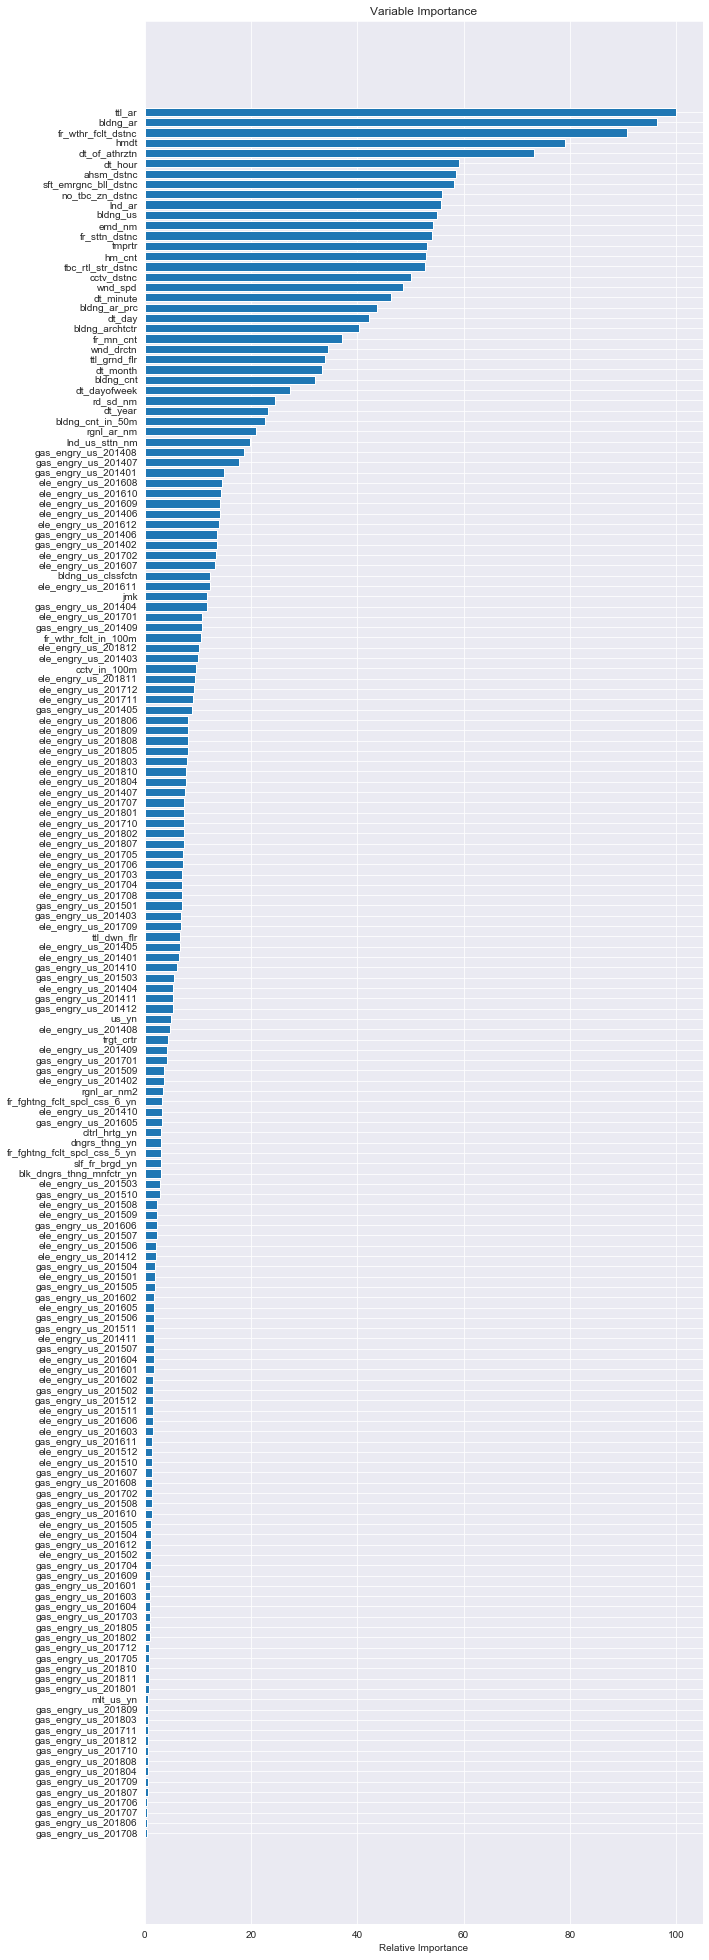

In [41]:
plot_feature_importance(forest, X_train, (10, 35))

---

NULL의 비율이 40% 이상인 column은 제거하고, 변수 fr_yn, dt_of_fr, id 만 제거하고 randomforest를 돌려본다.

In [45]:
n_estimators_10to100 = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
n_estimators_200to1000 = [200, 300, 400, 500, 600, 700, 800, 900, 1000]
n_estimators_1100to2000 = [1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000]

list_f1 = []
list_ac = []

In [46]:
list_f1_10to100 = []
list_ac_10to100 = []

for elem in n_estimators_10to100:
    forest = RandomForestClassifier(n_jobs=-1, n_estimators=elem, random_state=42, max_features=round(math.sqrt(len(X_train.columns))))
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_val)
    list_f1_10to100.append(f1_score(y_val, y_pred))
    list_ac_10to100.append(accuracy_score(y_val, y_pred))
    
list_f1 = list_f1 + list_f1_10to100
list_ac = list_ac + list_ac_10to100

best_f1_score = -999999
best_f1_score_of_index = 0
best_accuracy = -999999
best_accuracy_of_index = 0

print('n_estimators가 10-100 사이에서의 결과\n')

tmp = 0
for i in n_estimators_10to100:
    print('n_estimators =', i, '일때 f1 score =', list_f1_10to100[tmp])
    tmp = tmp + 1

print()

tmp = 0
for i in n_estimators_10to100:
    print('n_estimators =', i, '일때 accuracy =', list_ac_10to100[tmp])
    tmp = tmp + 1
    
tmp = -1
for i in list_f1_10to100:
    tmp = tmp + 1
    if best_f1_score < i:
        best_f1_score = i
        best_f1_score_of_index = tmp

print()
print('가장 좋은 f1 score를 가지는 n_estimator는', n_estimators_10to100[best_f1_score_of_index], '이며,')
print('그 값은 f1_score =', best_f1_score, '입니다.')

tmp = -1
for i in list_ac_10to100:
    tmp = tmp + 1
    if best_accuracy < i:
        best_accuracy = i
        best_accuracy_of_index = tmp
      
print()
print('가장 좋은 accucracy를 가지는 n_estimator는', n_estimators_10to100[best_accuracy_of_index], '입니다.')
print('그 값은 accuracy =', best_accuracy, '입니다.')

n_estimators가 10-100 사이에서의 결과

n_estimators = 10 일때 f1 score = 0.43249897414854327
n_estimators = 20 일때 f1 score = 0.4718030182684671
n_estimators = 30 일때 f1 score = 0.48201160541586074
n_estimators = 40 일때 f1 score = 0.4914512922465209
n_estimators = 50 일때 f1 score = 0.49230769230769234
n_estimators = 60 일때 f1 score = 0.4928343949044586
n_estimators = 70 일때 f1 score = 0.492974708952228
n_estimators = 80 일때 f1 score = 0.4934549781832606
n_estimators = 90 일때 f1 score = 0.49822904368358906
n_estimators = 100 일때 f1 score = 0.49377759935768767

n_estimators = 10 일때 accuracy = 0.7995071035082633
n_estimators = 20 일때 accuracy = 0.8071904899971006
n_estimators = 30 일때 accuracy = 0.8058857639895622
n_estimators = 40 일때 accuracy = 0.8145839373731516
n_estimators = 50 일때 accuracy = 0.8134241809220064
n_estimators = 60 일때 accuracy = 0.8153087851551174
n_estimators = 70 일때 accuracy = 0.8169034502754422
n_estimators = 80 일때 accuracy = 0.8148738764859379
n_estimators = 90 일때 accuracy = 0.81516381559

In [47]:
list_f1_200to1000 = []
list_ac_200to1000 = []

for elem in n_estimators_200to1000:
    forest = RandomForestClassifier(n_jobs=-1, n_estimators=elem, random_state=42, max_features=round(math.sqrt(len(X_train.columns))))
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_val)
    list_f1_200to1000.append(f1_score(y_val, y_pred))
    list_ac_200to1000.append(accuracy_score(y_val, y_pred))

list_f1 = list_f1 + list_f1_200to1000
list_ac = list_ac + list_ac_200to1000

best_f1_score = -999999
best_f1_score_of_index = 0
best_accuracy = -999999
best_accuracy_of_index = 0

print('n_estimators가 200-1000 사이에서의 결과\n')

tmp = 0
for i in n_estimators_200to1000:
    print('n_estimators =', i, '일때 f1 score =', list_f1_200to1000[tmp])
    tmp = tmp + 1

print()

tmp = 0
for i in n_estimators_200to1000:
    print('n_estimators =', i, '일때 accuracy =', list_ac_200to1000[tmp])
    tmp = tmp + 1
    
tmp = -1
for i in list_f1_200to1000:
    tmp = tmp + 1
    if best_f1_score < i:
        best_f1_score = i
        best_f1_score_of_index = tmp

print()
print('가장 좋은 f1 score를 가지는 n_estimator는', n_estimators_200to1000[best_f1_score_of_index], '이며,')
print('그 값은 f1_score =', best_f1_score, '입니다.')

tmp = -1
for i in list_ac_200to1000:
    tmp = tmp + 1
    if best_accuracy < i:
        best_accuracy = i
        best_accuracy_of_index = tmp
      
print()
print('가장 좋은 accucracy를 가지는 n_estimator는', n_estimators_200to1000[best_accuracy_of_index], '입니다.')
print('그 값은 accuracy =', best_accuracy, '입니다.')

n_estimators가 200-1000 사이에서의 결과

n_estimators = 200 일때 f1 score = 0.4946407304485907
n_estimators = 300 일때 f1 score = 0.5031746031746032
n_estimators = 400 일때 f1 score = 0.5035516969218626
n_estimators = 500 일때 f1 score = 0.5001969279243798
n_estimators = 600 일때 f1 score = 0.5
n_estimators = 700 일때 f1 score = 0.5038045654785742
n_estimators = 800 일때 f1 score = 0.5061876247504989
n_estimators = 900 일때 f1 score = 0.5043824701195219
n_estimators = 1000 일때 f1 score = 0.5041949660407512

n_estimators = 200 일때 accuracy = 0.8154537547115106
n_estimators = 300 일때 accuracy = 0.8184981153957669
n_estimators = 400 일때 accuracy = 0.817628298057408
n_estimators = 500 일때 accuracy = 0.8160336329370832
n_estimators = 600 일때 accuracy = 0.8182081762829806
n_estimators = 700 일때 accuracy = 0.820382719628878
n_estimators = 800 일때 accuracy = 0.8206726587416643
n_estimators = 900 일때 accuracy = 0.8196578718469122
n_estimators = 1000 일때 accuracy = 0.8200927805160916

가장 좋은 f1 score를 가지는 n_estimator는 800 이며,
그 값

In [48]:
list_f1_1100to2000 = []
list_ac_1100to2000 = []

for elem in n_estimators_1100to2000:
    forest = RandomForestClassifier(n_jobs=-1, n_estimators=elem, random_state=42, max_features=round(math.sqrt(len(X_train.columns))))
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_val)
    list_f1_1100to2000.append(f1_score(y_val, y_pred))
    list_ac_1100to2000.append(accuracy_score(y_val, y_pred))

list_f1 = list_f1 + list_f1_1100to2000
list_ac = list_ac + list_ac_1100to2000

best_f1_score = -999999
best_f1_score_of_index = 0
best_accuracy = -999999
best_accuracy_of_index = 0

print('n_estimators가 1100-2000 사이에서의 결과\n')

tmp = 0
for i in n_estimators_1100to2000:
    print('n_estimators =', i, '일때 f1 score =', list_f1_1100to2000[tmp])
    tmp = tmp + 1

print()

tmp = 0
for i in n_estimators_1100to2000:
    print('n_estimators =', i, '일때 accuracy =', list_ac_1100to2000[tmp])
    tmp = tmp + 1
    
tmp = -1
for i in list_f1_1100to2000:
    tmp = tmp + 1
    if best_f1_score < i:
        best_f1_score = i
        best_f1_score_of_index = tmp

print()
print('가장 좋은 f1 score를 가지는 n_estimator는', n_estimators_1100to2000[best_f1_score_of_index], '이며,')
print('그 값은 f1_score =', best_f1_score, '입니다.')

tmp = -1
for i in list_ac_1100to2000:
    tmp = tmp + 1
    if best_accuracy < i:
        best_accuracy = i
        best_accuracy_of_index = tmp
      
print()
print('가장 좋은 accucracy를 가지는 n_estimator는', n_estimators_1100to2000[best_accuracy_of_index], '입니다.')
print('그 값은 accuracy =', best_accuracy, '입니다.')

n_estimators가 1100-2000 사이에서의 결과

n_estimators = 1100 일때 f1 score = 0.5028022417934347
n_estimators = 1200 일때 f1 score = 0.5031948881789138
n_estimators = 1300 일때 f1 score = 0.5033905065815716
n_estimators = 1400 일때 f1 score = 0.5021991203518592
n_estimators = 1500 일때 f1 score = 0.5013994402239105
n_estimators = 1600 일때 f1 score = 0.5051792828685259
n_estimators = 1700 일때 f1 score = 0.5053720652606447
n_estimators = 1800 일때 f1 score = 0.5049780963759458
n_estimators = 1900 일때 f1 score = 0.5047770700636942
n_estimators = 2000 일때 f1 score = 0.5045762037405491

n_estimators = 1100 일때 accuracy = 0.8199478109596985
n_estimators = 1200 일때 accuracy = 0.8196578718469122
n_estimators = 1300 일때 accuracy = 0.819512902290519
n_estimators = 1400 일때 accuracy = 0.819512902290519
n_estimators = 1500 일때 accuracy = 0.8192229631777327
n_estimators = 1600 일때 accuracy = 0.8199478109596985
n_estimators = 1700 일때 accuracy = 0.8198028414033053
n_estimators = 1800 일때 accuracy = 0.8198028414033053
n_estimators 

In [49]:
tmp = 0

for i in list_f1:
    if i > tmp:
        tmp = i

x = list_f1.index(tmp)

if x <= 9:
    best_f1 = list_f1_10to100[x]
    best_n = n_estimators_10to100[x]
elif x <= 18:
    x = x - 9
    best_f1 = list_f1_200to1000[x]
    best_n = n_estimators_200to1000[x]
elif x <= 28:
    x = x - 18
    best_f1 = list_f1_1100to2000[x]
    best_n = n_estimators_1100to2000[x]

print('가장 좋은 모델은 n_estimators =', best_n, '이며')
print('그때의 f1_score =', best_f1, '이다.')

가장 좋은 모델은 n_estimators = 900 이며
그때의 f1_score = 0.5043824701195219 이다.
